# Beta Bank

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Kesimpulan](#review_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Menghapus beberapa kolom yang kurang relevan terhadap penelitian](#dataprep_1)
    * [2.2 Menangani kolom yang memiliki missing value](#dataprep_2)
    * [2.3 Menerapkan dummies untuk kolom kategorikal](#dataprep_3)
    * [2.4 Menerapkan skala untuk kolom numerikal](#dataprep_4)
    * [2.5 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 Membentuk feature dan target dengan split data](#analysis_1)
    * [3.1.1 Set train, set valid, dan set test](#analysis_1_1)
    * [3.2 Membentuk feature dan target dengan split data](#analysis_2)
    * [3.2.1 Klasifikasi Decision Tree](#analysis_2_1)
    * [3.2.2 Klasifikasi Random Forest](#analysis_2_2)
    * [3.2.3 Logistic Regression](#analysis_2_3)
    * [3.3 Memperhitungkan Class Imbalance](#analysis_3)
    * [3.3.1 Penyesuaian Class Weight](#analysis_3_1)
    * [3.3.2 Upsampling](#analysis_3_2)
    * [3.4 Kesimpulan](#analysis_conclusion)


* [Tahap 4. Pengujian](#test)
    * [4.1 Pengujian pada set test"](#test_1)

* [Temuan](#end)

[Kembali ke Daftar Isi](#back)

## Pendahuluan <a id='intro'></a>

Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru. 

Peneliti membantu Bank Beta untuk memprediksi apakah nasabah akan leave atau stay berdasarkan Credit Score, Geographical Location, Gender,	Age, Tenure (berapa lama mereka telah berada di bank), Balance,	Number of Products yang mereka gunakan, apakah mereka memiliki kartu kredit, apakah mereka nasabah aktif, dan Estimated Salary. Informasi ini telah dikumpulkan dalam kumpulan data yang akan peneliti pelajari selanjutnya.

### Tujuan: 
Pada kasus ini, tugas peneliti adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. 

Membuat model dengan:
* Decision Tree
* Random Forest
* Logistic Regression

Menangani class imbalance dengan:
* Penyesuaian Class Weight
* Upsampling

### Tahapan
Peneliti memiliki data terkait  para klien yang disimpan dalam *file*:
- /datasets/Churn.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian

[Kembali ke Daftar Isi](#back)


## Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan

In [1]:
import pandas as pd #untuk mengelola dataframe
from sklearn.tree import DecisionTreeClassifier #untuk mengolah model Decision Tree
from sklearn.ensemble import RandomForestClassifier #untuk mengolah model Random Forest
from sklearn.linear_model import LogisticRegression #untuk mengolah model Logistic Regression
from sklearn.model_selection import train_test_split #untuk melakukan split dataset
from sklearn.preprocessing import StandardScaler #untuk melakukan penskalaan nilai
from sklearn.utils import shuffle #untuk melakukan pengacakan kolom
from sklearn.metrics import f1_score #untuk menghitung nilai f1 dari model
from sklearn.metrics import roc_auc_score #untuk menghitung nilai auc-roc dari model

**Step 1.2**
Melakukan load data yang diperlukan dari file *churn.csv* dan menyimpan ke
dalam dataframe df

In [2]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')
#membaca file csv dan konversi ke dataframe df

df.head() 
#melihat 5 baris awal dari dataframe df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info() #melihat informasi umum tentang dataframe df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Kolom Exited akan menjadi target sedangkan kolom lainnya akan berfungsi sebagai feature. Kita perlu membuat dummies untuk kolom kategorikal. Kemudian, kita perlu menskalakan kolom numerikal, kecuali kolom dengan nilai biner (0 atau 1) seperti kolom HasCrCard dan kolom IsActiveMember.

In [4]:
df.isna().sum() #memeriksa missing value pada dataframe df

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Terdapat missing value pada kolom Tenure, mengingat kolom Tenure bersifat numerikal kita dapat mengisi nilai yang hilang pada kolom Tenure dengan nilai median agar tidak bias.

In [5]:
df.duplicated().sum() #memeriksa nilai yang terduplikasi pada dataframe df

0

Tidak terdapat nilai yang terduplikasi dalam dataframe df. Oleh karenanya tidak perlu dilakukan tindakan lebih lanjut terkait duplicated value.

[Kembali ke Daftar Isi](#back)

### Kesimpulan <a name="review_conclusion"></a>

Data type kolom pada dataframe df telah sesuai dan dapat diproses untuk analisis lebih lanjut. Untuk analisis lebih lanjut, terdapat kolom yang kurang relevan yang dapat didrop yakni RowNumber, CustomerId, dan Surname. Terdapat missing value pada kolom Tenure sebanyak 909 item (9,09%) yang perlu ditindaklanjuti sebelum dilakukan analisis lebih lanjut. Tidak ada nilai yang terduplikasi sehingga tidak perlu dilakukan tindak lanjut terhadap duplicated value. 

## Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

### Menghapus beberapa kolom yang kurang relevan terhadap penelitian <a name="dataprep_1"></a>

Kolom yang kurang relevan tersebut adalah RowNumber, CustomerId, dan Surname. RowNumber pada dasarnya adalah indeks, hanya saja dimulai dari 1 dan bukan 0. CustomerId hanya untuk membedakan pelanggan secara unik, Nama Belakang juga merupakan alat identifikasi lainnya, keduanya berbeda untuk setiap pengamatan. Kolom-kolom ini tidak akan membantu dalam pelatihan model sehingga kita dapat menghapus kolom-kolom ini.

**Step 2.1**
Menghapus kolom-kolom yang kurang relevan terhadap penelitian.

In [6]:
data=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#menghapus kolom dari dataframe df and menamakan hasilnya menjadi data
data.info()
#melihat informasi umum tentang data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Kita telah berhasil menghapus beberapa kolom yang kurang relevan dengan penelitian.

### Menangani kolom yang memiliki missing value <a name="dataprep_2"></a>

Saat kita memeriksa nilai unik kolom Tenure, ditemukan nilai NaN (hilang).

**Step 2.2**
Memeriksa isi kolom yang hilang (missing value) dan mengisinya dengan nilai yang tepat.

In [7]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Kita dapat mengisi sel kosong ini dengan nilai median agar tidak menimbulkan bias.

In [8]:
data['Tenure']=data['Tenure'].fillna(data['Tenure'].median())#mengisi missing value dengan nilai median
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

Kita telah berhasil menangani missing value pada kolom Tenure

### Menerapkan dummies untuk kolom kategorikal <a name="dataprep_3"></a>

Kita memiliki 2 kolom yang bersifat kategorikal yakni Geography dan Gender.

**Step 2.3**
Memeriksa kolom-kolom kategorikal.

In [9]:
data['Geography'].value_counts() #melihat rincian unique value yang dimiliki kolom Geography

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
data['Gender'].value_counts() #melihat rincian unique value yang dimiliki kolom Gender

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Pada kolom Geografi terdapat 3 nilai yaitu Spain, Germany, dan France. Saat kita membuat dummies untuk kolom-kolom ini, kolom-kolom tersebut akan diganti dengan 3 kolom berikut yakni Geography_Spain, Geography_Germany, dan Geography_France. Setiap kolom akan mengambil nilai 1 pada observasi dimana kolom Geografi memiliki nilai country, selain itu akan mendapat 0. Hal yang sama akan terjadi pada kolom Gender. Kita akan menggunakan fungsi pd.get_dummies di seluruh tabel 'data' untuk kolom kategorikal. Kita dapat menghapus salah satu kolom dummies untuk kedua skenario tersebut karena terdapat angka 0 di Spain dan Germany, dengan kata lain berarti angka 1 untuk France. Kita dapat melakukan ini dengan menggunakah parameter drop_first=True.

**Step 2.4**
Mengganti nilai kolom-kolom kategorikal dengan dummies.

In [11]:
data=pd.get_dummies(data, drop_first=True)
#mengganti kolom kategorikal dengan dummies dan menghapus dummies pertama untuk setiap kolom pengganti
data.head()
#meihat 5 baris awal dari dataframe data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,True,False


Kita telah berhasil membuat dummies untuk kolom Geography dan Gender.

### Menerapkan skala untuk kolom numerikal <a name="dataprep_4"></a>

Kolom-kolom numerikal yakni 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', dan 'EstimatedSalary'. Variabel dalam kolom-kolom ini ini tidak memiliki rentang yang pasti sehingga kita perlu menskalakannya (atau menstandarkannya) dengan menggunakan z-score. Kita melakukan hal ini karena secara algoritma umum, variabel dengan penyebaran yang luas biasanya dianggap lebih penting dan kita tidak menginginkan hal tersebut terjadi. Jadi kita akan menjalankan fungsi StandardScaler(), kita akan fit() kolom numerikal di dalamnya dan melakukan transform untuk mendapatkan nilai berskala.

**Step 2.5**
Melakukan proses penskalaan untuk nilai pada kolom-kolom numerikal.

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
#membuat list yang berisi kolom-kolom numerikal
scaler = StandardScaler()
#menjalankan fungsi scaler
scaler.fit(data[numeric])
#melakukan train scaler dengan data pada kolom-kolom numerikal
data[numeric] = scaler.transform(data[numeric])
#mentransform the data menjadi nilai berskala
data.head()
#meihat 5 baris awal dari dataframe data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,False,False,False
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,False,True,False
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,False,False,False
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,False,False,False
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,False,True,False


Kita telah berhasil menskalakan nilai pada kolom-kolom numerikal.

[Kembali ke Daftar Isi](#back)

### Kesimpulan <a name="dataprep_conclusion"></a>

Telah dilakukan drop kolom yang kurang relevan yakni RowNumber, CustomerId, dan Surname. Telah dilakukan penggantian missing value pada kolom Tenure sebanyak 909 item dengan nilai median.
Telah diterapkan dummies untuk kolom-kolom kategorikal (Geography dan Gender).  Telah diterapkan skala untuk kolom-kolom numerikal (CreditScore, Age, Tenure, Balance, NumOfProducts, dan EstimatedSalary)

## Tahap 3. Analisis <a name='analysis'></a>

## Membentuk feature dan target dengan split data <a name="analysis_1"></a>

Kolom Exited adalah target sedangkan kolom lainnya adalah feature. Kita perlu membagi kedua set tersebut menjadi set train, set valid, dan set test yang masing-masing menghasilkan 60%, 20%, dan 20%. Untuk mendapatkannya, kita akan menjalankan fungsi train_test_split() dua kali. Pertama, kita akan membagi menjadi set train dan set kedua yang mengikuti atturan parameter test_size=0.4 (yang merupakan persentase dari set data yang seharusnya menjadi set kedua). Kemudian, kita akan melakukan split pada set kedua dari proses split sebelumnya menjadi dua ukuran yang sama (test_size=0.5) dan hasilnya adalah set valid (20% dari dataset asli) dan set test (20% dari dataset asli). Random_state akan diset menjadi 12345 dan akan tetap sama selama proses train model.

### Set train, set valid, dan set test <a name="analysis_1_1"></a>

**Step 3.1**
Melakukan proses split untuk mendapatkan set train, set valid, dan set test.

In [13]:
features=data.drop('Exited', axis=1)
#feature diset berisikan seluruh kolom kecuali kolom Exited
target=data['Exited']
#target diset sama dengan kolom Exited
features_train, features_test_valid, target_train, target_test_valid=train_test_split(features, target,\
                                                                                      test_size=0.4,\
                                                                                     random_state=12345)
#split pertama untuk mendapatkan set train untuk feature dan target (60%) dan set kedua (40%)
features_valid, features_test, target_valid, target_test=train_test_split(features_test_valid, \
                                                                        target_test_valid, test_size=0.5, \
                                                                       random_state=12345)
#split kedua pada set kedua dari proses split sebelumnya, yang membagi set validation dan set test sama besar
print(len(features_train), len(target_train), len(features_valid), len(target_valid), len(features_test), \
     len(target_test))
#mencetak data jumlah item dari 3 set feature dan target yang telah didapat dari proses split

6000 6000 2000 2000 2000 2000


Kita telah berhasil menetapkan feature dan target, serta membagi data menjadi set train, set valid, dan set test dengan proporsi telah ditentukan.

## Membangun Model dengan Class Imbalance <a name="analysis_2"></a>

### Klasifikasi Decision Tree <a name="analysis_2_1"></a>

Kita akan menjalankan fungsi DecisiontreeClassifier(). Kita akan melakukan setting 2 hyperparameter yakni random_state dan max_depth. Hyperparameter random_state harus konsisten secara keseluruhan sehingga kita akan memberikannya nilai tetap (12345). Hyperparameter max_depth adalah hyperparameter yang akan kita tindaklanjuti. Jadi kita akan mengulang sekumpulan nilai untuk max_depth (1 hingga 10) dan mendapatkan nilai f1 dan nilai AUC-ROC di mana keduanya merupakan metrik untuk kualitas model. F1_score memproses target dari validasi dan prediksi. Fungsi roc_auc_score memproses target dari validasi dengan probabilitas kelas positif dari setiap observasi dalam set valid. Kita menggunakan fungsi predct_proba() untuk keperluan ini.

**Step 2.7**
Menentukan model klasifikasi Decision Tree dengan nilai F1 tertinggi.

In [14]:
for i in range(1, 11): #loop melalui nilai i dari 1 hingga 10    
    dt_model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    #membuat model Decision Tree dengan nilai max_depth berupa i
    dt_model.fit(features_train, target_train)
    #train model menggunakan feature dan target dari set train
    dt_pred_valid=dt_model.predict(features_valid)
    #mendapatkan prediction dari model menggunakan feature dari set valid
    probabilities_valid = dt_model.predict_proba(features_valid)
    #mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
    probabilities_one_valid = probabilities_valid[:, 1]
    #mendapatkan positive class probabilities untuk setiap observasi feature set valid
    print('Max depth', i, 'Nilai F1 =', f1_score(target_valid, dt_pred_valid), 'Nilai AUC-ROC =', \
         roc_auc_score(target_valid, probabilities_one_valid))
    #mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

Max depth 1 Nilai F1 = 0.0 Nilai AUC-ROC = 0.6925565119556736
Max depth 2 Nilai F1 = 0.5217391304347825 Nilai AUC-ROC = 0.7501814673449512
Max depth 3 Nilai F1 = 0.4234875444839857 Nilai AUC-ROC = 0.7973440741838507
Max depth 4 Nilai F1 = 0.5528700906344411 Nilai AUC-ROC = 0.813428129858032
Max depth 5 Nilai F1 = 0.5406249999999999 Nilai AUC-ROC = 0.8221680508592478
Max depth 6 Nilai F1 = 0.5696969696969697 Nilai AUC-ROC = 0.8164631712023421
Max depth 7 Nilai F1 = 0.5320813771517998 Nilai AUC-ROC = 0.8138530658907929
Max depth 8 Nilai F1 = 0.5454545454545454 Nilai AUC-ROC = 0.8119854644656693
Max depth 9 Nilai F1 = 0.5633802816901409 Nilai AUC-ROC = 0.7801515554775917
Max depth 10 Nilai F1 = 0.5406162464985994 Nilai AUC-ROC = 0.7658451236699957


Nilai F1 terbaik 0.57 didapat dari percobaan model dengan max_depth 6, memiliki nilai AUC-ROC value 0.82

### Klasifikasi Random Forest <a name="analysis_2_2"></a>

Kita akan menjalankan fungsi RandomForestClassifier() di mana setting hyperparameter random_state kita harus tetap sama seperti sebelumnya. Hyperparameter yang akan kita gunakan adalah max_ depth dan n_estimators. Kita akan membuat daftar kosong, kemudian kita akan loop nilai max_depth dan juga loop nilai n_estimators di dalam loop tersebut. Kita akan menggunakan loop ini untuk mendapatkan model dengan permutasi berbeda dari nilai max_ depth dan n_estimators yang akan kita simpan dalam list, untuk selanjutnya dari sana kita akan memilih model dengan nilai f1 tertinggi.

**Step 2.8**
Menentukan model klasifikasi Random Forest dengan nilai F1 tertinggi.

In [15]:
rf = []#menyiapkapkan list kosong
for i in range(1, 11):#loop melalui nilai i mulai 1 hingga 10 untuk max_depth
    for j in range(10, 101, 10):#:#loop melalui nilai j mulai 1 hingga 100 dengan step 10 untuk n_estimator
        rf_model = RandomForestClassifier(random_state=12345, max_depth=i, n_estimators=j)
        #membuat model random forest
        rf_model.fit(features_train, target_train)
        #train model menggunakan feature dan target dari set train
        rf.append(rf_model)#memasukkan model ke dalam list
    
print(max(rf, key=lambda rf_model: f1_score(rf_model.predict(features_valid), target_valid)))
#mencetak model dengan nilai f1 tertinggi dari list berdasarkan prediction yang dibuat dengan menggunakan feature dari set valid dan target aktual dari set valid 


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=12345)


Model Random Forest dengan nilai F1 tertinggi memiliki setting hyperparameter max_ depth=10 dan n_estimators=10. Untuk selanjutnya kita dapat melatih dengan hyperparameter tersebut dan mendapatkan  nilai F1 dan ROC_AUC.

In [16]:
best_rf_model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=10)
#membuat model
best_rf_model.fit(features_train, target_train)
#train model menggunakan feature dan target dari set train
best_rf_pred = best_rf_model.predict(features_valid)
#mendapatkan prediction dari model menggunakan feature dari set valid
probabilities_rf_valid=best_rf_model.predict_proba(features_valid)
#mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
probabilities_rf_one_valid=probabilities_rf_valid[:, 1]
#mendapatkan positive class probabilities untuk setiap observasi feature set valid
print('F1 =', f1_score(target_valid, best_rf_pred), 'AUC-ROC =', \
      roc_auc_score(target_valid, probabilities_rf_one_valid))
#mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

F1 = 0.5869894099848714 AUC-ROC = 0.8461436676969979


Nilai F1 sebesar 0.59 dengan nilai AUC-ROC sebesar 0.85

### Logistic Regression <a name="analysis_2_3"></a>

Selanjutnya kita akan menggunakan fungsi LogisticRegression(). Seperti biasa hyperparamter random_state harus sama, namun untuk hyperparameter max_ depth dan hyperparameter n_estimators tidak diaplikasikan pada model ini. Hyperparameter yang diperlukan adalah solver yang bernilai 'liblinear'.

**Step 2.9**
Menentukan model klasifikasi Logistic Regression dengan nilai F1 tertinggi.

In [17]:
lr_model = LogisticRegression(random_state=12345, solver='liblinear')
#membuat model
lr_model.fit(features_train, target_train)
#train model menggunakan feature dan target dari set train
lr_valid_pred=lr_model.predict(features_valid)
#mendapatkan prediction dari model menggunakan feature dari set valid
probabilities_lr_valid=lr_model.predict_proba(features_valid)
#mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
probabilities_lr_one_valid=probabilities_lr_valid[:, 1]
#mendapatkan positive class probabilities untuk setiap observasi feature set valid
print('F1 =', f1_score(target_valid, lr_valid_pred), 'AUC-ROC =', \
     roc_auc_score(target_valid, probabilities_lr_one_valid))
#mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

F1 = 0.33108108108108103 AUC-ROC = 0.7587497504824008


Model yang terbaik adalah Random Forest Classifier dengan hyperparameter max_ depth=10 dan hyperparameter n_estimators=10 karena memiliki nilai F1 tertinggi (0,59) dengan nilai AUC-ROC 0,84. Hal ini dapat dijadikan acuan untuk penggunaan ke depannya.

## Memperhitungkan Class Imbalance <a name="analysis_3"></a>

Let us study class imbalance so as to know the portions or shares of each class in the target of the training set. To do so, we will use the value_counts() function and set the parameter normalize=True.

Mari kita pelajari Class Imbalance untuk mengetahui porsi atau share masing-masing class dalam target set train. Dalam pelaksanaannya kita akan menggunakan fungsi value_counts() dan mengatur parameter normalize=True.

**Step 2.10**
Melakukan evaluasi kondisi Class Imbalance.

Exited
0    0.800667
1    0.199333
Name: proportion, dtype: float64


<Axes: xlabel='Exited'>

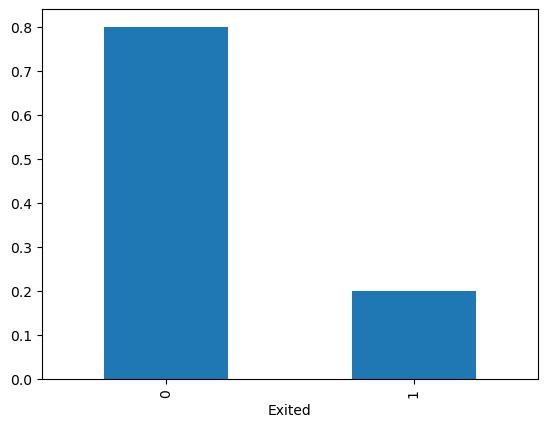

In [18]:
class_frequency = target_train.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
#melihat unique value dari target_train dan porsi dari keseluruhan data

Porsi negative class (0) sebesar 80% data, sedangkan positive class (1) sebesar 20%. Sehingga dapat dikatakan ada 4 kali lebih banyak angka 0 dibandingkan angka 1. Kita akan menerapkan dua pendekatan untuk mengatasi Class Imbalance ini.

### Penyesuaian Class Weight <a name="analysis_3_1"></a>

Kita perlu melakukan setting hyperparameter class_weight='balanced' saat melatih model. Hal ini akan membuat class yang lebih langka (1 dalam hal ini) memiliki bobot lebih banyak.

In [19]:
bal_rf_model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=10, \
                                       class_weight='balanced')
#membuat model
bal_rf_model.fit(features_train, target_train)
#train model menggunakan feature dan target dari set train
bal_rf_pred = bal_rf_model.predict(features_valid)
#mendapatkan prediction dari model menggunakan feature dari set valid
proba_bal_rf_valid=bal_rf_model.predict_proba(features_valid)
#mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
proba_bal_rf_one_valid=proba_bal_rf_valid[:, 1]
#mendapatkan positive class probabilities untuk setiap observasi feature set valid
print('F1 =', f1_score(target_valid, bal_rf_pred), 'AUC-ROC =', \
      roc_auc_score(target_valid, proba_bal_rf_one_valid))
#mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

F1 = 0.6038647342995168 AUC-ROC = 0.8418065981526625


Nilai F1 sudah lebih baik dari sebelumnya (>0,59), namun untuk nilai AUC-ROC sedikit menurun. True Positive Rate (TPR) juga akan cenderung ikut sedikit menurun.

### Upsampling <a name="analysis_3_2"></a>

Dalam upsampling, pada dasarnya kita akan mengulang class yang lebih langka dan observasinya dalam waktu yang cukup agar kelas tersebut dapat disandingkan secara merata dengan kelas lainnya. Kita telah melihat sebelumnya bahwa jumlah angka 0 adalah 4 kali lebih banyak daripada jumlah angka 1, sehingga kita akan mengulangi angka 1 dan observasinya sebanyak 4 kali untuk menyandingkannya dengan angka 0 di set train secara merata. Selanjutnya kita harus melakukan pengacakan dengan menggunakan fungsi shuffle().

In [20]:
def upsample(features, target, repeat):
#membuat fungsi upsample dengan argument features, target, dan repeat
    features_zeros = features_train[target_train == 0]
    #mendapatkan feature berisi negative class
    features_ones = features_train[target_train == 1]
    #mendapatkan feature berisi positive class
    target_zeros = target_train[target_train == 0]
    #mendapatkan target berisi negative class
    target_ones = target_train[target_train == 1]
    #mendapatkan target berisi positive class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    #melakukan upsampling feature dengan mengkombinasikan feature berisi negative class dan feature berisi positive class yang telah di-repeat
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    #melakukan upsampling target dengan mengkombinasikan target berisi negative class dan target berisi positive class yang telah di-repeat
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    #mengacak hasil upsampling feature dan target
    return features_upsampled, target_upsampled 
    #mengembalikan nilai hasil upsampling feature dan target

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
#melakukan upsamling terhadap set train baik feature maupun target dengan memasukkannya ke dalam fungsi upsample dengan menetapkan konstanta untuk repeat (dalam hal ini 4)
print(features_upsampled.shape, target_upsampled.shape)
#mencetak ukuran dari set yang sudah dilakukan upsampling baik feature maupun target

(9588, 11) (9588,)


Sekarang kita dapat melatih model dengan menggunakan feature dan target yang telah ditingkatkan sampelnya.

In [21]:
ups_rf_model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=10)
#membuat model
ups_rf_model.fit(features_upsampled, target_upsampled)
#train model menggunakan feature dan target dari set train
ups_rf_pred = ups_rf_model.predict(features_valid)
#mendapatkan prediction dari model menggunakan feature dari set valid
proba_ups_rf_valid=ups_rf_model.predict_proba(features_valid)
#mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
proba_ups_rf_one_valid=proba_ups_rf_valid[:, 1]
#mendapatkan positive class probabilities untuk setiap observasi feature set valid
print('F1 =', f1_score(target_valid, ups_rf_pred), 'AUC-ROC =', \
      roc_auc_score(target_valid, proba_ups_rf_one_valid))
#mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

F1 = 0.5836909871244635 AUC-ROC = 0.8335694929197491


Nilai F1 lebih rendah dari yang telah didapatkan saat menggunakan penyesuaian class weight. Namun, kebalikannya terjadi pada AUC-ROC. True Positive Rate memiliki kecenderungan meningkat.

### Kesimpulan <a name="analysis_conclusion"></a>

Dengan demikian, kita dapat melanjutkan dengan pendekatan penyesuaian class weight karena memiliki skor F1 yang lebih tinggi yaitu 0,59.

[Kembali ke Daftar Isi](#back)

## Tahap 4. Pengujian <a name='test'></a>

### Pengujian pada set test <a name="test_1"></a>

Model kita (dengan penyesuaian bobot kelas) sudah bisa diterapkan ke set test. Sebelumnya kita perlu melatih model menggunakan set train dan set valid. Untuk keperluan tersebut kita dapat menggunakan fungsi pd.concat().

In [22]:
features_train_final=pd.concat([features_train] + [features_valid])
#membuat tumpukan vertikal dari feature pada set train dan feature pada set valid 
target_train_final=pd.concat([target_train] + [target_valid])
#membuat tumpukan vertikal dari target pada set train dan target pada set valid 
final_rf_model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=10, \
                                       class_weight='balanced')
#membuat model
final_rf_model.fit(features_train_final, target_train_final)
#train model menggunakan feature dan target dari set train
final_rf_pred = final_rf_model.predict(features_test)
#mendapatkan prediction dari model menggunakan feature dari set valid
proba_rf_test=final_rf_model.predict_proba(features_test)
#mendapatkan negative class probabilities dan positive class probabilities untuk setiap observasi feature dari set valid
proba_rf_one_test=proba_rf_test[:, 1]
#mendapatkan positive class probabilities untuk setiap observasi feature set valid
print('F1 =', f1_score(target_test, final_rf_pred), 'AUC-ROC =', \
      roc_auc_score(target_test, proba_rf_one_test))
#mencetak nilai f1 score dengan membandingkan predictions dengan target dari set valid sekaligus mencetak nilai auc_roc dengan membandingkan target set valid terhadap positive class probabilities

F1 = 0.6187214611872146 AUC-ROC = 0.8509656393397403


Nilai akhir F1 adalah sebesar 0,60 di mana telah melebih ambang batas sebesar 0,59

## Temuan <a name="end"></a>

Kita telah melakukan pemrosesan kumpulan data (membuat dummies dari kolom kategorikal, menskalakan kolom numerikal, dan mengisi missing value). 
Kita telah melakukan split data (tanpa memperhitungkan class imbalance), kita telah melatih model klasifikasi Decision Tree, Random Forest, dan Logistic Regression dan menentukan Random Forest sebagai model klasifikasi yang terbaik dengan nilai f1 tertinggi (0,59) dan nilai ROC-AUC sebesar 0,85.
Kemudian dengan memperhitungkan class imbalance, kita menggunakan pendekatan penyesuaian class weight dan upsampling. Dari penggunaan kedua pendekatan tersebut, kita memilih untuk menggunakan penyesuaian class weight karena memiliki nilai F1 lebih tinggi yaitu 0,59 meski upsampling memiliki nilai AUC-ROC lebih tinggi. Pada akhirnya kita melakukan train model dengan set train dan set valid dan menerapkannya pada set test dan mendapatkan nilai F1 sebesar 0,60.

[Kembali ke Daftar Isi](#back)